In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [11]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
## Checking Missing Values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

NO missing values present

In [7]:
## Checking Duplicates
df.duplicated().sum()

0

No duplicates in data set

In [9]:
## Check null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
## Checking number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Check Statistics of Data Set'

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Exploring Data

In [15]:
print('Categories in gender variable:  ', end='')
print(df['gender'].unique())

print('Categories in race/ethnicity variable:  ', end='')
print(df['race/ethnicity'].unique())

print('Categories in parental level of education variable:  ', end='')
print(df['parental level of education'].unique())

print('Categories in lunch variable:  ', end='')
print(df['lunch'].unique())

print('Categories in test preparation course variable:  ', end='')
print(df['test preparation course'].unique())



Categories in gender variable:  ['female' 'male']
Categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [16]:
df['gender'].dtype

dtype('O')

In [17]:
## Define numerical and categorical features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('numeric features:', num_features)
print('categorical features:', cat_features)

numeric features: ['math score', 'reading score', 'writing score']
categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for 'Total Score' and 'Average Score'

In [18]:
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total_Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(f'No. of students with full marks in Maths: {math_full}')
print(f'No. of students with full marks in Reading: {reading_full}')
print(f'No. of students with full marks in Writing: {writing_full}')

No. of students with full marks in Maths: 7
No. of students with full marks in Reading: 17
No. of students with full marks in Writing: 14


In [23]:
reading_less_20 = df[df['reading score']<=20]['Average'].count()
writing_less_20 = df[df['writing score']<=20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

print(f'No. of students with full marks in Maths: {math_less_20}')
print(f'No. of students with full marks in Reading: {reading_less_20}')
print(f'No. of students with full marks in Writing: {writing_less_20}')

No. of students with full marks in Maths: 4
No. of students with full marks in Reading: 1
No. of students with full marks in Writing: 3


Exploring Data

Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Fucntion (KDE)

HISTOGRAM

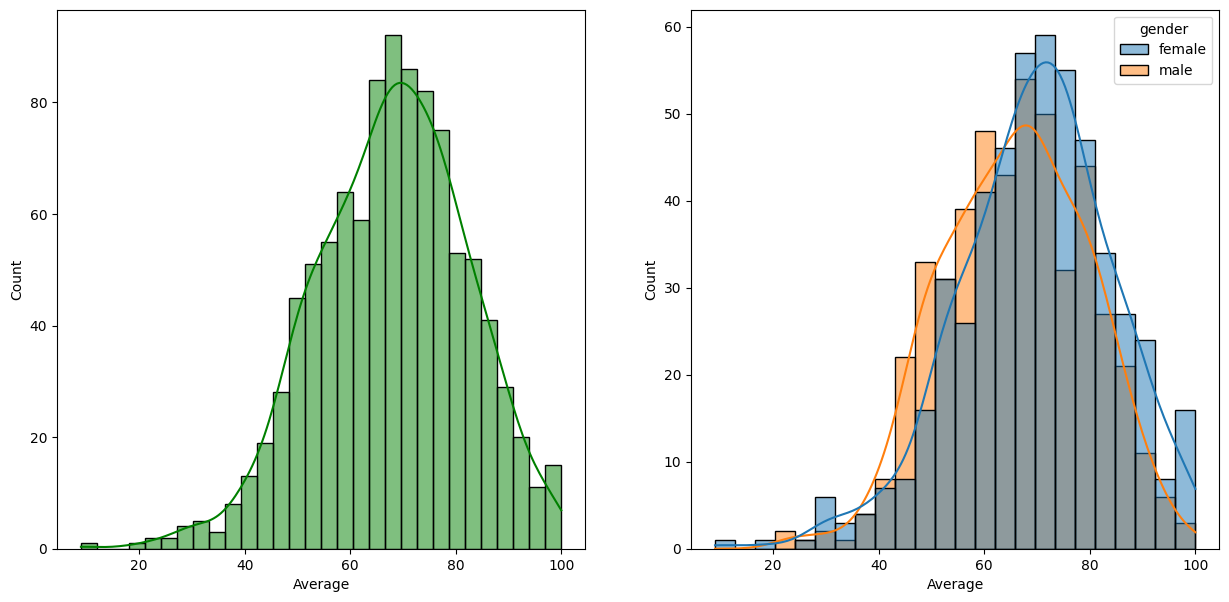

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()
